<a href="https://colab.research.google.com/github/Neoneto/Coding_Dojo_Week6/blob/main/Regression_Metrics_and_Decision_Tree_Exercises_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Metrics Exercise (Core)

Submitted by Kenneth Alaba

(Regression Trees exercise continued on this notebook)

## Pre-requisites

In [130]:
# import libraries
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [131]:
# Load the data

## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

## Opening the file
filename = '/content/drive/My Drive/Coding Dojo/06 Week 6: Regression Models/Boston_Housing_from_Sklearn.csv'

## Storing the data in df
df = pd.read_csv(filename, )

# display first few rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [132]:
# display the dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


## Exploratory Viz

In [133]:
# import additional libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# Calculate correlation between numerical columns
corr = df.corr()

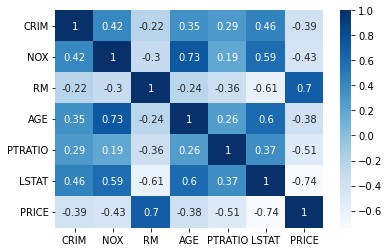

In [135]:
# Create a heatmap
sns.heatmap(corr, annot = True, cmap = 'Blues')

Since we want to predict the PRICE from the available features, we only consider the features with strong correlation with this target.

In [136]:
# resets the indes
corr.reset_index(inplace = True)

In [137]:
# Determine the columsn with strong correlation to price
strong = corr['index'].loc[abs(corr.PRICE) >= 0.5]
strong

2         RM
4    PTRATIO
5      LSTAT
6      PRICE
Name: index, dtype: object

## Train, Test, Split

In [138]:
# Isolate the columns that we will use
new_df = df[strong]
new_df.head()

,RM,PTRATIO,LSTAT,PRICE
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [139]:
# Define the target and features
X = new_df.drop(columns=['PRICE'])
y = new_df['PRICE']

In [140]:
# Split into train and test sets
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)

## Model Training

In [141]:
# Instantiate the model
reg = LinearRegression()

In [142]:
# Train the model
reg.fit(X_train, y_train)

LinearRegression()

## Evaluating the Model

In [143]:
# Import additional libraries to get the metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Coefficient of Determination $R^2$ 

In [144]:
# r2 score for train set
r2_train = reg.score(X_train, y_train)
print(f'The model, evaluated on the training set has a R2 score of {r2_train:.3f}')

The model, evaluated on the training set has a R2 score of 0.688


In [145]:
# r2 score for test set
r2_test = reg.score(X_test, y_test)
print(f'The model, evaluated on the test set has a R2 score of {r2_test:.3f}')

The model, evaluated on the test set has a R2 score of 0.633


The $R^2$ for the test and train set are close to each other. This means that the model does not underfit nor overfit. 

### Mean Absolute Error (MAE)

In [146]:
# calculate the MAE between the y_test and the predictions of the model using
# features of the test set 
mae = mean_absolute_error(y_test, reg.predict(X_test))
print(f'The Mean Absolute Error of the model (evaluated on the test set) is {mae:.3f}')

The Mean Absolute Error of the model (evaluated on the test set) is 3.392


### Mean Squared Error (MSE)

In [147]:
# calculate the MSE between the y_test and the predictions of the model using
# features of the test set 
mse = mean_squared_error(y_test, reg.predict(X_test))
print(f'The Mean Squared Error of the model (evaluated on the test set) is {mse:.3f}')

The Mean Squared Error of the model (evaluated on the test set) is 25.689


### Root Mean Squared Error (RMSE)

In [148]:
# calculate the RMSE between the y_test and the predictions of the model using
# features of the test set 
rmse = np.sqrt( mean_squared_error(y_test, reg.predict(X_test)) )
print(f'The RMSE of the model (evaluated on the test set) is {rmse:.3f}')

The RMSE of the model (evaluated on the test set) is 5.068


This means that given a set of features, the predictions for the PRICE the model will give will have an RMS error of around 5,068 USD. 

# Regression Trees in Python

In [149]:
# import library
from sklearn.tree import DecisionTreeRegressor

## Train, Test, Split
Using the same data as the previous exercise

In [150]:
# split the data
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)

## Regression tree model with default parameters

In [151]:
# Instantiate the decision tree model
dec_tree = DecisionTreeRegressor(random_state = 42)

In [152]:
# train the model
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [153]:
# Get the depth of the decision tree
dec_tree.get_depth()

20

## Optimal max_depth

In [154]:
# List of values to try for max_depth:
max_depth_range = np.arange(2, 20) # will try every value between 2 and 20

# List the r2 score of the decision tree models of varying max_depth
r2 = []

# Iterate over the range of max_depth
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

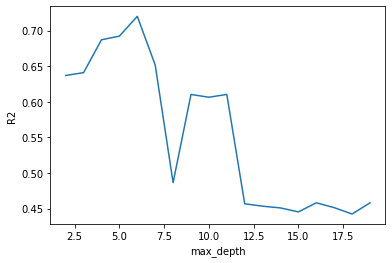

In [155]:
# Visulaize the r2 scores as a function of max_depth
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

From the plot, we can see that the $R^2$ value increases for the first few max_depth and then decreases almost exponentially after reaching the maximum value.

In [156]:
# get the highest r2 score
max_r2 = max(r2)

# get the max_depth that produced the highest score
max_d = max_depth_range[r2.index(max_r2)]

# print the result
print(f'The highest r2 score is {max_r2:.3f} from a max_depth of {max_d}')

The highest r2 score is 0.720 from a max_depth of 6


## Regression tree model with max_depth of 6

In [157]:
# Instantiate a new decision tree model
dec_tree = DecisionTreeRegressor(max_depth = max_d, random_state = 42)

In [158]:
# train the model
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

### Evaluate the model

In [159]:
# Get the r2 score of the new model with the train and test sets
r2_tree_train = dec_tree.score(X_train, y_train)
r2_tree_test = dec_tree.score(X_test, y_test)

# Print the result
print(f'The final model has a max_depth of {max_d} and has an r2 score on the training set of {r2_tree_train:.3f} and on the test set of {r2_tree_test:.3f}.')

The final model has a max_depth of 6 and has an r2 score on the training set of 0.921 and on the test set of 0.720.


For this model, the r2 scores are far from each other with the training set having a higher value. This suggests that the model has overfit in exchange for a higher r2 score and a minimal max_depth.